# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df.head()

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = len(merge_df["Mouse ID"].unique())
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


duplicates = merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Select the rows that are duplicates based on both 'Mouse ID' and 'Timepoint'
duplicate_mice = merge_df[duplicates]

# Get unique Mouse IDs that are duplicated
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_df = merge_df[merge_df['Mouse ID'] == 'g989']
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned_mice = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep= False)

cleaned_mice = merge_df[merge_df['Mouse ID'] != 'g989']
cleaned_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
total_cleaned_mice = len(cleaned_mice["Mouse ID"].unique())
total_cleaned_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# mean, median, variance, standard deviation, and SEM of the tumor volume


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_dict = {"Mean Tumor Volume": merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(),
                        "Median Tumor Volume": merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(),
                        "Tumor Volume variance": merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(),
                        "Tumor Volume Standard Dev.": merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(),
                        "Tumor Volume Std. Err.": merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()}

# Display the DataFrame
summary_final = pd.DataFrame(summary_dict)
summary_final

# Assemble the resulting series into a single summary DataFrame.
#results_df = pd.concat([average_tumor_volume, median_tumor_volume, mice_variance, standard_deviation], axis=1)

 

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume variance,Tumor Volume Standard Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = merge_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
agg_summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

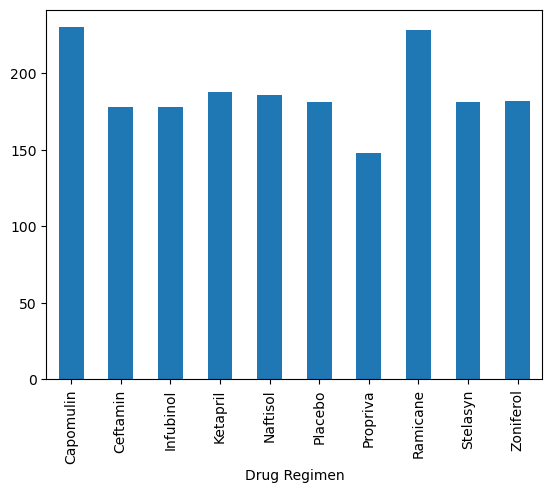

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
cleaned_mice.groupby('Drug Regimen').count()['Sex'].plot.bar()



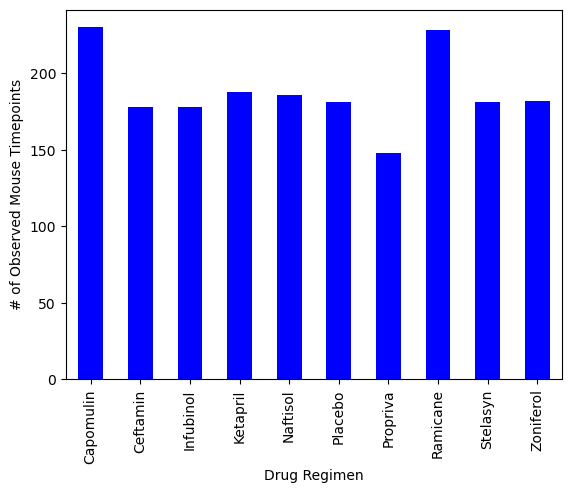

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#group by drug name
drug_counts = cleaned_mice.groupby('Drug Regimen').size()

#add labels
drug_counts.plot(kind='bar', color= 'blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()


<Axes: ylabel='Mouse ID'>

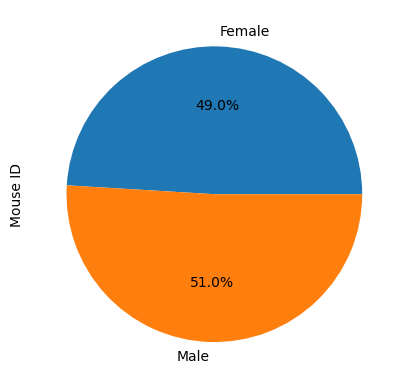

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleaned_mice.groupby('Sex').count()['Mouse ID'].plot.pie(autopct="%1.1f%%")






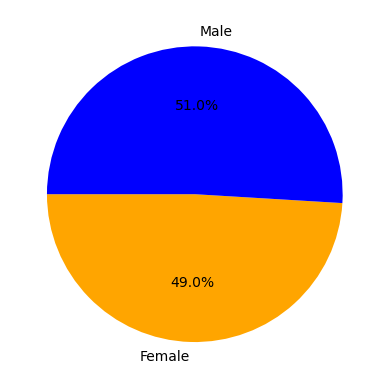

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#count female and male mice
female_count = cleaned_mice[cleaned_mice['Sex'] =='Female'].shape[0]
male_count = cleaned_mice[cleaned_mice['Sex'] == 'Male'].shape[0]

# The colors of each section of the pie chart
colors = ["orange","blue"]
labels=['Female','Male']
sizes = [female_count, male_count]

plt.pie(sizes, labels=labels, colors= colors,
        autopct="%1.1f%%", startangle=180)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
drugs = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#create new data fram that only shows capomulin, ramicane, infubnol and ceftamin
# Start by getting the last (greatest) timepoint for each mouse

max_df = cleaned_mice.groupby("Mouse ID")["Timepoint"].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
box_plot_df = pd.merge(max_df, cleaned_mice, on=['Mouse ID', 'Timepoint'])
box_plot_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Determine outliers using upper and lower bounds
#list of outlier- calulate all IQR for each drug regimen

# Create empty list to fill with tumor vol data (for plotting)
drug_regimen = []
# Put treatments into a list for for loop (and later for plot labels)
for drug in drugs:
# Locate the rows which contain mice on each drug and get the tumor volumes
    temp_df = box_plot_df.loc[box_plot_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
# add subset
    drug_regimen.append(temp_df)
drug_regimen


[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [29]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Determine outliers using upper and lower bounds
#list of outlier- calulate all IQR for each drug regimen

results= []

for drug in drugs:
# Locate the rows which contain mice on each drug and get the tumor volumes
    iqr_s = box_plot_df.loc[box_plot_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    quartiles = iqr_s.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    lower_filter = iqr_s < lower_bound
    upper_filter = iqr_s > upper_bound
    total= lower_filter|upper_filter
    
    outliers_df= iqr_s.loc[total]
    
    #results = results.append({'Drug': drug, 'Lower Quartile': lowerq, 'Upper Quartile': upperq,'IQR': iqr, 'Lower Bound': lower_bound, 'Upper Bound': upper_bound, 'Outlilers': outliers_df})
    print(f'Drug Name: {drug},IQR is {iqr} ,The potential outliers are {outliers_df}')


Drug Name: Capomulin,IQR is 7.781863460000004 ,The potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug Name: Ramicane,IQR is 9.098536719999998 ,The potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug Name: Infubinol,IQR is 11.477135160000003 ,The potential outliers are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Drug Name: Ceftamin,IQR is 15.577752179999997 ,The potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)


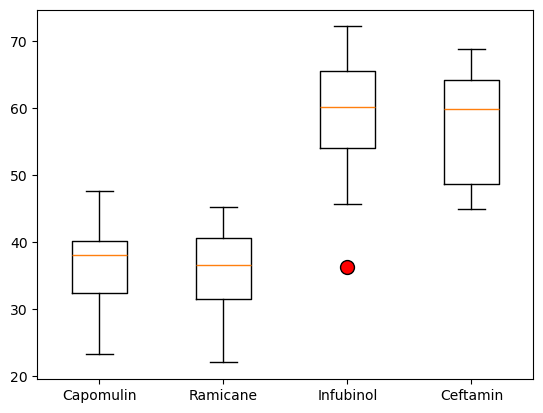

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#filter data to mouse at final timepoint, filter based on drug

plt.boxplot(drug_regimen, labels= drugs,flierprops=dict(marker='o', markerfacecolor='r', markersize=10))
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509_data = cleaned_mice[(cleaned_mice['Drug Regimen'] == 'Capomulin') & (cleaned_mice['Mouse ID'] == 'l509')]

plt.figure(figsize=(10,6))
plt.plot(mouse_l509_data['Timepoint'], mouse_l509_data['Tumor Volume (mm3)'], marker='o', linestyle='-', label='l509')

# Set plot labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse l509')

# Add legend
plt.legend(loc='upper left')

# Show plot
plt.grid(True)
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_mice[cleaned_mice["Drug Regimen"] == "Capomulin"]

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.figure(figsize=(10,6))
plt.scatter(mouse_weights, avg_tumor_volume, color='blue', alpha=0.6)

plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Avg. Tumor Volume for Capomulin Regimen')

plt.grid(True)
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin 

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

correlation_coefficient = mouse_weights.corr(avg_tumor_volume)
print("Correlation Coefficient", correlation_coefficient)

from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)

plt.figure(figsize=(10,6))
plt.scatter(mouse_weights, avg_tumor_volume, color='blue', label='Data Points')
plt.plot(mouse_weights, intercept + slope * mouse_weights, color='red', label='Linear Regression')
plt.title('Linear Regression: Mouse Wt(g) vs. Avg. Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()
